Importing libraries

In [42]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Importing data

In [43]:
dt=pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Performing EDA On Data

Renaming columns

In [44]:
dt=dt.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)

In [45]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [46]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
dt.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Data Visulization

Plotting the data to check for outliers

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

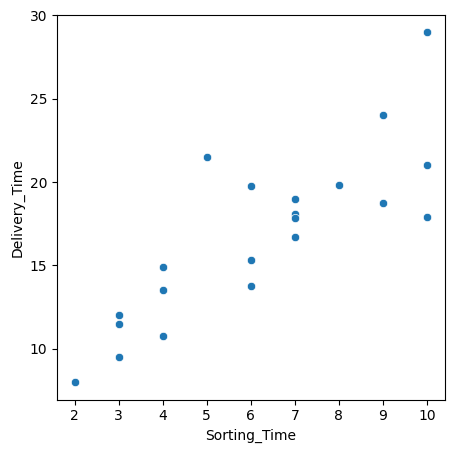

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Sorting_Time',y = 'Delivery_Time',data = dt,palette = 'Set1')

In [49]:
# correlation

dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Delivery_Time', ylabel='Density'>

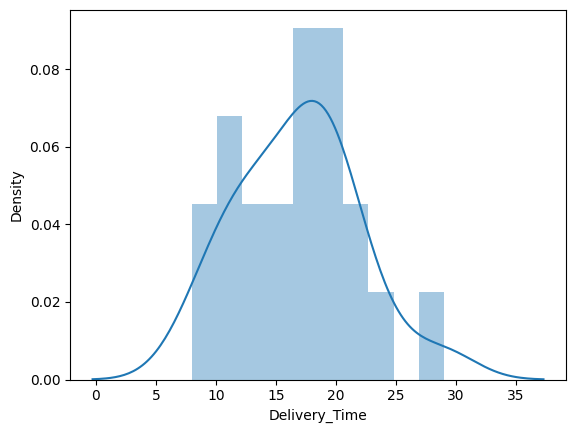

In [50]:
sns.distplot(dt['Delivery_Time'], bins = 10, kde = True)

<Axes: xlabel='Sorting_Time', ylabel='Density'>

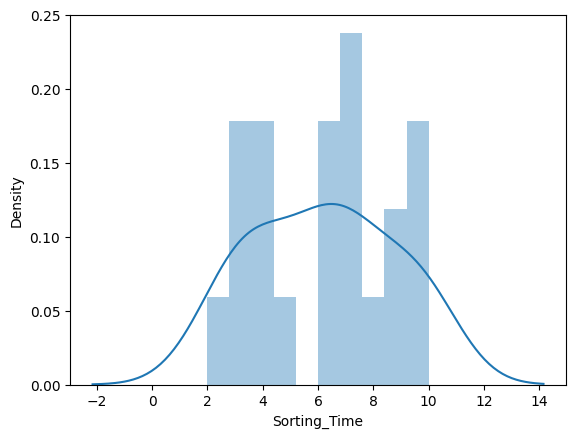

In [51]:
sns.distplot(dt['Sorting_Time'], bins = 10, kde = True)

<Axes: >

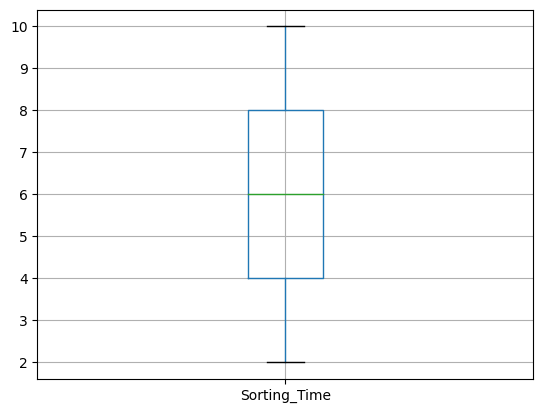

In [52]:
dt.boxplot(column=['Sorting_Time'],grid=True)


<Axes: >

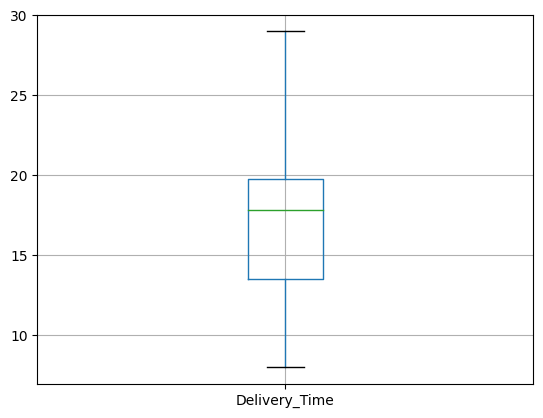

In [53]:
dt.boxplot(column=['Delivery_Time'],grid=True)

In [54]:
dt['Delivery_Time'].skew()

0.3523900822831107

Fitting a Linear Regression Model

Using Ordinary least squares (OLS) regression

In [55]:
import statsmodels.formula.api as smf


In [56]:
#OLS=Ordinary Least Squares
model = smf.ols("Delivery_Time~Sorting_Time",data = dt).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        13:51:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

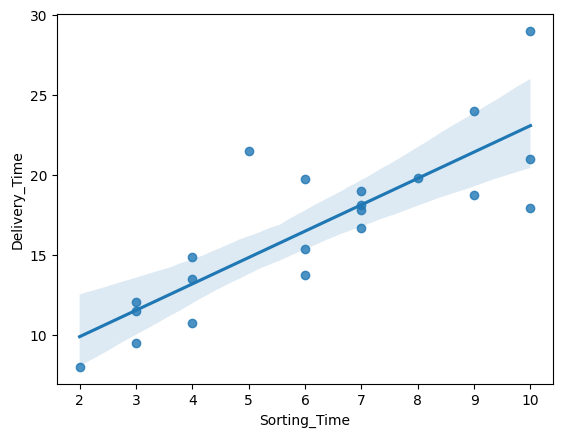

In [58]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=dt)

In [59]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [60]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Predicitng from Model without any data transformation

In [61]:
dt['Predicted']=model.fittedvalues
dt.head()

,Delivery_Time,Sorting_Time,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [62]:
#To generate the residual values
#Difference between Actual & Fitted Values
dt['Error'] = model.resid
dt.head()

,Delivery_Time,Sorting_Time,Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [63]:
dt['Error_Sq']=(dt['Error'])**2
dt[0:5]

,Delivery_Time,Sorting_Time,Predicted,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124


In [64]:
Mean_Squared_Error=dt['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [65]:
model.rsquared
#68.7% of variation in the dependent variable is explained by the given independent variable

0.6822714748417231

Data Visualization after Transformation

In [66]:
import scipy.stats as stats

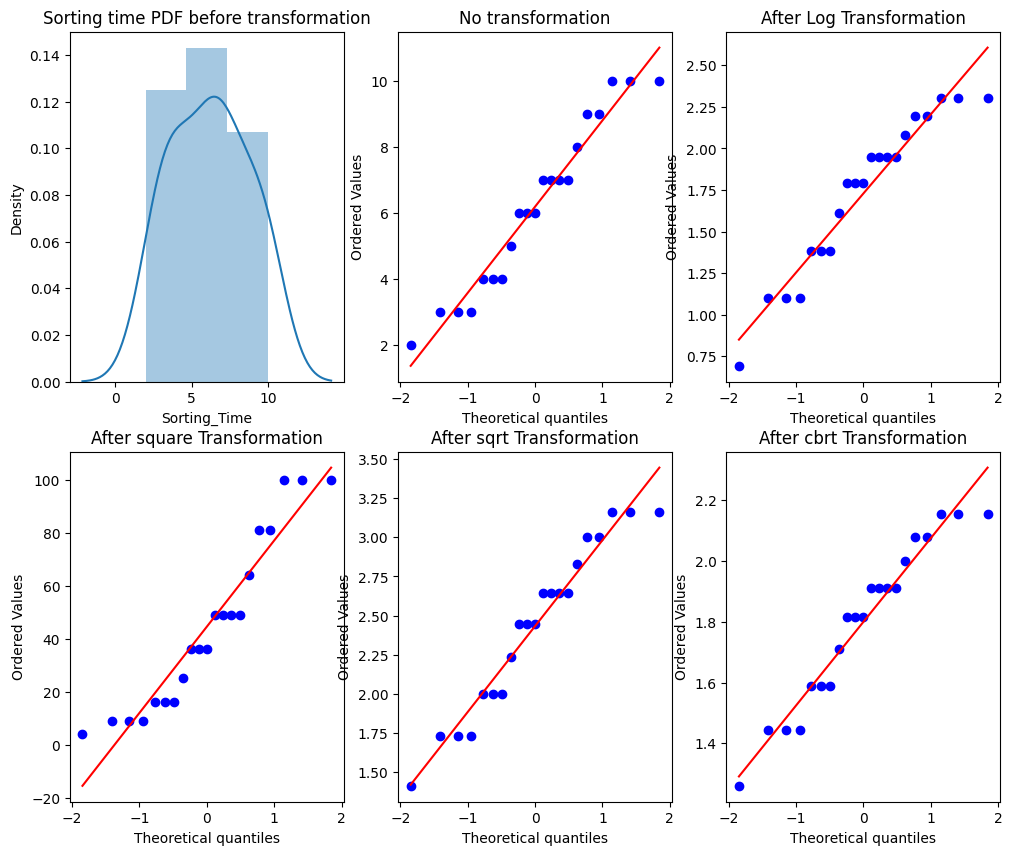

In [67]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(dt['Sorting_Time'])
plt.title('Sorting time PDF before transformation')

plt.subplot(232)
stats.probplot(dt['Sorting_Time'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(dt['Sorting_Time']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(dt['Sorting_Time']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(dt['Sorting_Time']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(dt['Sorting_Time']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')
plt.show()

In [68]:
dt_new=dt.copy()
dt_new.head()

,Delivery_Time,Sorting_Time,Predicted,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124


In [69]:
dt_new=dt_new.iloc[:,0:2]
dt_new.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Apply square root transformation

In [70]:
dt_new['Sorting_Time_sqrt']= np.sqrt(dt_new['Sorting_Time'])
dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278


Building a model after square root transformation

In [71]:
#OLS=Ordinary Least Squares
model = smf.ols("Delivery_Time~Sorting_Time_sqrt",data = dt_new).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.61e-06
Time:                        13:53:51   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
Sorting_Time_sqrt     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_Time_sqrt', ylabel='Delivery_Time'>

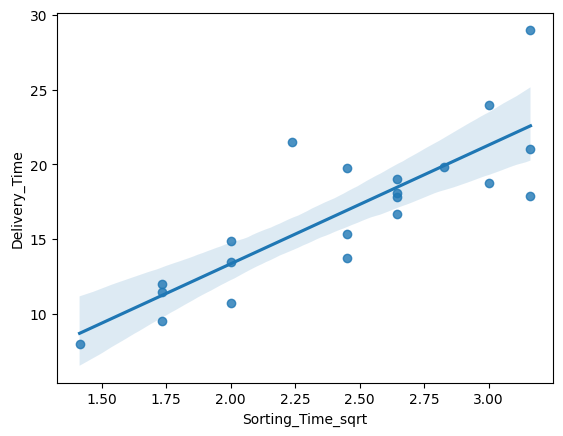

In [73]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="Sorting_Time_sqrt", y="Delivery_Time", data=dt_new)

In [74]:
#Coefficients
model.params

Intercept           -2.518837
Sorting_Time_sqrt    7.936591
dtype: float64

In [75]:
dt_new['Predicted']=model.fittedvalues
dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted
0,21.00,10,3.162278,22.578867
1,13.50,4,2.000000,13.354345
2,19.75,6,2.449490,16.921761
3,24.00,9,3.000000,21.290936
4,29.00,10,3.162278,22.578867


In [76]:
#To generate the residual values
#Difference between Actual & Fitted Values
dt_new['Error'] = model.resid
dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error
0,21.00,10,3.162278,22.578867,-1.578867
1,13.50,4,2.000000,13.354345,0.145655
2,19.75,6,2.449490,16.921761,2.828239
3,24.00,9,3.000000,21.290936,2.709064
4,29.00,10,3.162278,22.578867,6.421133


In [77]:
dt_new['Error_Sq']=(dt_new['Error'])**2
dt_new[0:5]

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error,Error_Sq
0,21.00,10,3.162278,22.578867,-1.578867,2.492821
1,13.50,4,2.000000,13.354345,0.145655,0.021215
2,19.75,6,2.449490,16.921761,2.828239,7.998936
3,24.00,9,3.000000,21.290936,2.709064,7.339030
4,29.00,10,3.162278,22.578867,6.421133,41.230949


In [78]:
Mean_Squared_Error=dt_new['Error_Sq'].mean()
Mean_Squared_Error

7.461328308595396

In [79]:
model.rsquared

0.695806227630867

Applying transformation on log, square and Cuberoot

In [82]:
dt_new['Sorting_Time_log']= np.log(dt_new['Sorting_Time'])
dt_new['Sorting_Time_square']= np.square(dt_new['Sorting_Time'])
dt_new['Sorting_Time_cbrt']= np.cbrt(dt_new['Sorting_Time'])

dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error,Error_Sq,Sorting_Time_log,Sorting_Time_square,Sorting_Time_cbrt
0,21.00,10,3.162278,22.578867,-1.578867,2.492821,2.302585,100,2.154435
1,13.50,4,2.000000,13.354345,0.145655,0.021215,1.386294,16,1.587401
2,19.75,6,2.449490,16.921761,2.828239,7.998936,1.791759,36,1.817121
3,24.00,9,3.000000,21.290936,2.709064,7.339030,2.197225,81,2.080084
4,29.00,10,3.162278,22.578867,6.421133,41.230949,2.302585,100,2.154435


In [92]:
#OLS=Ordinary Least Squares
model_log = smf.ols("Delivery_Time~Sorting_Time_log",data = dt_new).fit()
model_square = smf.ols("Delivery_Time~Sorting_Time_square",data = dt_new).fit()
model_cbrt = smf.ols("Delivery_Time~Sorting_Time_cbrt",data = dt_new).fit()

<Axes: xlabel='Sorting_Time_log', ylabel='Delivery_Time'>

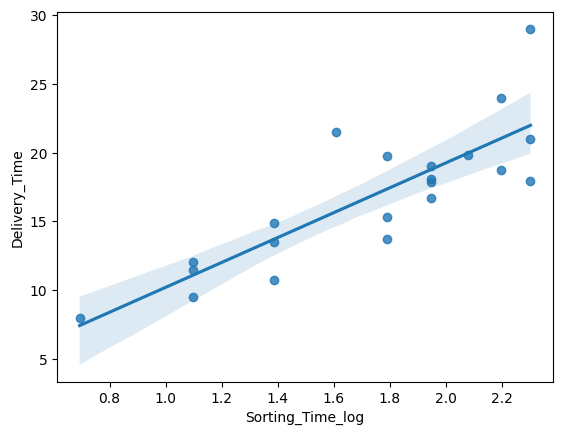

In [93]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="Sorting_Time_log", y="Delivery_Time", data=dt_new)


<Axes: xlabel='Sorting_Time_square', ylabel='Delivery_Time'>

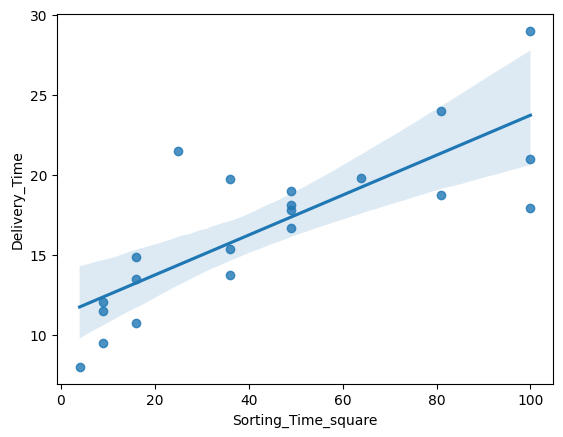

In [94]:
sns.regplot(x="Sorting_Time_square", y="Delivery_Time", data=dt_new)



<Axes: xlabel='Sorting_Time_cbrt', ylabel='Delivery_Time'>

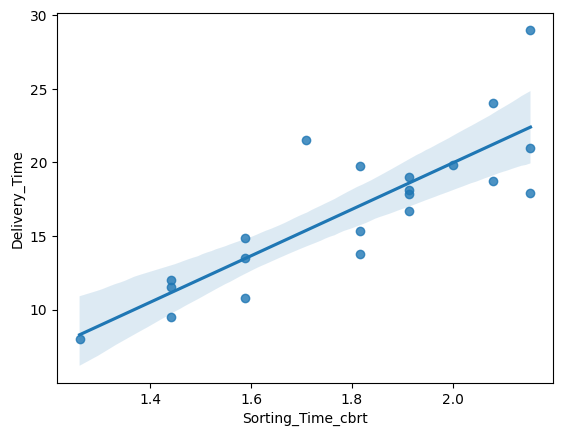

In [95]:

sns.regplot(x="Sorting_Time_cbrt", y="Delivery_Time", data=dt_new)


In [96]:
#Coefficients
print(model_log.params)
print(model_square.params)
print(model_cbrt.params)

Intercept           1.159684
Sorting_Time_log    9.043413
dtype: float64
Intercept              11.237205
Sorting_Time_square     0.124870
dtype: float64
Intercept           -11.579201
Sorting_Time_cbrt    15.767284
dtype: float64


In [97]:
dt_new['Predicted_log']=model_log.fittedvalues
dt_new['Predicted_square']=model_square.fittedvalues
dt_new['Predicted_cbrt']=model_cbrt.fittedvalues
dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error,Error_Sq,Sorting_Time_log,Sorting_Time_square,Sorting_Time_cbrt,Predicted_log,Predicted_square,Predicted_cbrt
0,21.00,10,3.162278,22.578867,-1.578867,2.492821,2.302585,100,2.154435,21.982913,23.724217,22.390381
1,13.50,4,2.000000,13.354345,0.145655,0.021215,1.386294,16,1.587401,13.696517,13.235127,13.449801
2,19.75,6,2.449490,16.921761,2.828239,7.998936,1.791759,36,1.817121,17.363305,15.732529,17.071854
3,24.00,9,3.000000,21.290936,2.709064,7.339030,2.197225,81,2.080084,21.030094,21.351685,21.218070
4,29.00,10,3.162278,22.578867,6.421133,41.230949,2.302585,100,2.154435,21.982913,23.724217,22.390381


In [98]:
#To generate the residual values
#Difference between Actual & Fitted Values
dt_new['Error_log'] = model_log.resid
dt_new['Error_square'] = model_square.resid
dt_new['Error_cbrt'] = model_cbrt.resid
dt_new.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error,Error_Sq,Sorting_Time_log,Sorting_Time_square,Sorting_Time_cbrt,Predicted_log,Predicted_square,Predicted_cbrt,Error_log,Error_square,Error_cbrt
0,21.00,10,3.162278,22.578867,-1.578867,2.492821,2.302585,100,2.154435,21.982913,23.724217,22.390381,-0.982913,-2.724217,-1.390381
1,13.50,4,2.000000,13.354345,0.145655,0.021215,1.386294,16,1.587401,13.696517,13.235127,13.449801,-0.196517,0.264873,0.050199
2,19.75,6,2.449490,16.921761,2.828239,7.998936,1.791759,36,1.817121,17.363305,15.732529,17.071854,2.386695,4.017471,2.678146
3,24.00,9,3.000000,21.290936,2.709064,7.339030,2.197225,81,2.080084,21.030094,21.351685,21.218070,2.969906,2.648315,2.781930
4,29.00,10,3.162278,22.578867,6.421133,41.230949,2.302585,100,2.154435,21.982913,23.724217,22.390381,7.017087,5.275783,6.609619


In [99]:
dt_new['Error_Sq_log']=(dt_new['Error_log'])**2
dt_new['Error_Sq_square']=(dt_new['Error_square'])**2
dt_new['Error_Sq_cbrt']=(dt_new['Error_cbrt'])**2
dt_new[0:5]

,Delivery_Time,Sorting_Time,Sorting_Time_sqrt,Predicted,Error,Error_Sq,Sorting_Time_log,Sorting_Time_square,Sorting_Time_cbrt,Predicted_log,Predicted_square,Predicted_cbrt,Error_log,Error_square,Error_cbrt,Error_Sq_log,Error_Sq_square,Error_Sq_cbrt
0,21.00,10,3.162278,22.578867,-1.578867,2.492821,2.302585,100,2.154435,21.982913,23.724217,22.390381,-0.982913,-2.724217,-1.390381,0.966117,7.421359,1.933160
1,13.50,4,2.000000,13.354345,0.145655,0.021215,1.386294,16,1.587401,13.696517,13.235127,13.449801,-0.196517,0.264873,0.050199,0.038619,0.070158,0.002520
2,19.75,6,2.449490,16.921761,2.828239,7.998936,1.791759,36,1.817121,17.363305,15.732529,17.071854,2.386695,4.017471,2.678146,5.696312,16.140069,7.172464
3,24.00,9,3.000000,21.290936,2.709064,7.339030,2.197225,81,2.080084,21.030094,21.351685,21.218070,2.969906,2.648315,2.781930,8.820343,7.013573,7.739134
4,29.00,10,3.162278,22.578867,6.421133,41.230949,2.302585,100,2.154435,21.982913,23.724217,22.390381,7.017087,5.275783,6.609619,49.239517,27.833885,43.687059


In [100]:
Mean_Squared_Error_log=dt_new['Error_Sq_log'].mean()
print(Mean_Squared_Error_log)
Mean_Squared_Error_square=dt_new['Error_Sq_square'].mean()
print(Mean_Squared_Error_square)
Mean_Squared_Error_cbrt=dt_new['Error_Sq_cbrt'].mean()
print(Mean_Squared_Error_cbrt)

7.470226320948425
9.068393138438143
7.421788796948226


In [103]:
print('model_log.rsquared:',model_log.rsquared)
print('model_square.rsquared:',model_square.rsquared)
print('model_cbrt.rsquared:',model_cbrt.rsquared)
print('model_sqrt.rsquared:',model.rsquared)

model_log.rsquared: 0.6954434611324223
model_square.rsquared: 0.6302871815826637
model_cbrt.rsquared: 0.6974182292354245
model_sqrt.rsquared: 0.695806227630867


After applying with different Transformation, best rsquared given by cuberoot transformation